In [1]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
import yfinance as yf

# Get the Stock Code
df = yf.download('SNGP.KA', start='2022-08-02', end='2023-08-02')

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-02,30.650000,31.200001,30.219999,30.820000,27.625168,827748
2022-08-03,30.750000,32.700001,30.750000,32.270000,28.924860,5237567
2022-08-04,32.700001,33.200001,32.299999,32.450001,29.086201,4568259
2022-08-05,32.500000,33.299999,32.150002,32.869999,29.462662,2909919
2022-08-09,32.869999,32.869999,32.869999,32.869999,29.462662,0
...,...,...,...,...,...,...
2023-07-24,44.000000,44.750000,43.200001,44.330002,44.330002,5364269
2023-07-25,44.200001,44.779999,43.820000,44.189999,44.189999,2544211
2023-07-26,44.330002,44.660000,43.889999,44.150002,44.150002,1753677


In [3]:
#Get the number of rows and columns in the data set
df.shape

(242, 6)

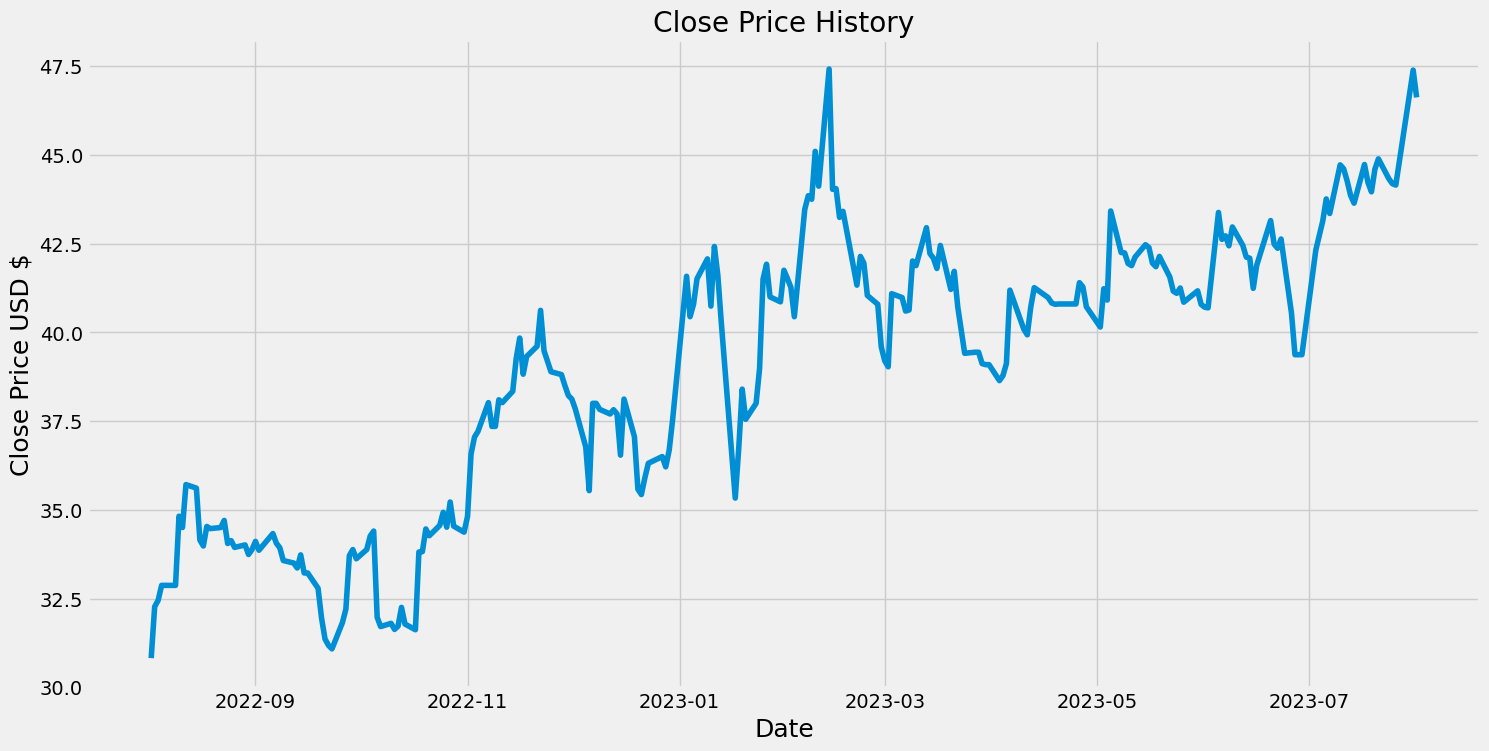

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'close column'
data = df.filter(['Close'])
#Convert the dataframe into numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

194

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.08734945],
       [0.09819284],
       [0.12349394],
       [0.12349394],
       [0.24096388],
       [0.22168679],
       [0.2945783 ],
       [0.2885543 ],
       [0.20060254],
       [0.19036145],
       [0.22349394],
       [0.21987963],
       [0.22168679],
       [0.23373503],
       [0.1945783 ],
       [0.19939769],
       [0.18795176],
       [0.19216861],
       [0.17590375],
       [0.18433745],
       [0.19819284],
       [0.1831326 ],
       [0.21144593],
       [0.19518084],
       [0.18734945],
       [0.16566267],
       [0.16144582],
       [0.15301212],
       [0.17530121],
       [0.14457842],
       [0.14457842],
       [0.11867478],
       [0.06807236],
       [0.03253018],
       [0.02168679],
       [0.01566267],
       [0.06024097],
       [0.0831326 ],
       [0.17409636],
       [0.18433745],
       [0.16867467],
       [0.18433745],
       [0.20722885],
       [0.21566278],
       [0.06927709],
       [0.05361443],
       [0.059

In [9]:
# Print the column names
print(train_data.columns)

# Verify the data in the DataFrame
print(train_data.head())  # Print the first few rows of the DataFrame


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
         Date       Open       High        Low      Close  Adj Close  \
0  2022-08-02  30.650000  31.200001  30.219999  30.820000  27.625168   
1  2022-08-03  30.750000  32.700001  30.750000  32.270000  28.924860   
2  2022-08-04  32.700001  33.200001  32.299999  32.450001  29.086201   
3  2022-08-05  32.500000  33.299999  32.150002  32.869999  29.462662   
4  2022-08-08        NaN        NaN        NaN        NaN        NaN   

      Volume  
0   827748.0  
1  5237567.0  
2  4568259.0  
3  2909919.0  
4        NaN  


In [10]:
import pandas as pd

# Load your historical data into a DataFrame (assuming 'date' and 'price' columns)
data = pd.read_csv('SNGP 2023.KA.csv')

# Assuming your data is sorted by date in ascending order
# We'll use the last 365 days' data as the training set
train_data = data.tail(365)

# Normalize the 'price' column (optional, but often beneficial for LSTM models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data['normalized_price'] = scaler.fit_transform(train_data[['price']])


KeyError: "None of [Index(['price'], dtype='object')] are in the [columns]"

In [7]:
# Assuming the column name is 'Close' instead of 'price'
# Modify the following line to use the correct column name
train_data['normalized_price'] = scaler.fit_transform(train_data[['Close']].values)

# or using .loc to set the new column on the original DataFrame
train_data.loc[:, 'normalized_price'] = scaler.fit_transform(train_data[['Close']].values)


NameError: name 'train_data' is not defined

In [ ]:
# Prepare the training data
n_timesteps = 60  # Number of timesteps (adjust as needed)
n_features = 1    # Number of features (e.g., 'normalized_price')

X_train, y_train = [], []
for i in range(n_timesteps, len(train_data)):
    X_train.append(train_data['normalized_price'][i-n_timesteps:i])
    y_train.append(train_data['normalized_price'][i])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1)  # Adjust 'epochs' and 'batch_size' as needed


In [ ]:
#Convert hte x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data 
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data into numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

In [ ]:
#Plot the data
train = data[:training_data_len]
x_valid = data[training_data_len:]

import pandas as pd

# Assuming you have a column named 'Close' in the 'data' DataFrame
valid = pd.DataFrame()
valid['Close'] = data[training_data_len:]['Close']
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
#Show the valid predicted price
valid

In [ ]:
#Get the qoute
apple_qoute = df = yf.download('SNGP.KA', start='2023-08-02', end='2022-08-02')


import yfinance as yf

# Download the data for the 'SNGP.KA' stock from the specified date range
apple_quote = yf.download('SNGP.KA', start='2022-08-02', end='2023-08-02')
# Create a new DataFrame with only the 'Close' column
new_df = apple_quote.filter(['Close'])
# Get the last 60 days' closing price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

#Scale the data to be  value between 0 and 1
# Assuming you have defined the 'scaler' object and scaled the 'last_60_days' data
last_60_days_scaled = scaler.transform(last_60_days)

# Create an empty list
X_test = []

#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
import yfinance as yf

# Download the data for the 'MEBL.KA' stock from a different date range
apple_quote = yf.download('SNGP.KA', start='2022-08-02', end='2023-08-03')

# Continue with the rest of your code using the 'apple_quote' DataFrame
# ...

# Print the 'Close' column
print(apple_quote['Close'])